In [1]:
import numpy as np
import math
from scipy import linalg
from sympy import symbols, solve

import cv2 as cv
import matplotlib.pyplot as plt

# Singular Value Decomposition 

In [2]:
def getNorm(vals):
    return math.sqrt(sum(list(map(lambda x: x**2, vals))))

In [3]:
img = cv.imread('lena.png')
img = cv.resize(img, (144, 144))
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
mat1 = np.asarray(gray_img, dtype=float)
mat2 = np.array([[3, 1, 1],
                [-1, 3, 1]], dtype=float)
mat3 = np.array([[1, 1],
                [0, 1],
                [1, 0]], dtype=float)

In [5]:
plt.imshow(mat1, cmap="gray")

In [ ]:
# Matrix singular
sleft = np.matmul(mat2, mat2.T)
sright = np.matmul(mat2.T, mat2)
mshape = mat2.shape
U = np.eye(mshape[0], dtype=float)
V = np.eye(mshape[1], dtype=float)

In [ ]:
An = sleft.copy()
epsilon = 0.05
flag = np.sum(np.tril(An, -1))
while (flag < -1 * epsilon or flag > epsilon):
    Q, R = np.linalg.qr(An)
    U = U @ Q
    An = R @ Q
    flag = np.sum(np.tril(An, -1))

eigenValue1 = [An[i, i] for i in range(An.shape[0])]
# eigenValue

In [ ]:
An = sright.copy()
epsilon = 0.05
flag = np.sum(np.tril(An, -1))
while (flag < -1 * epsilon or flag > epsilon):
    Q, R = np.linalg.qr(An)
    V = V @ Q
    An = R @ Q
    flag = np.sum(np.tril(An, -1))

eigenValue2 = [An[i, i] for i in range(An.shape[0])]
# eigenValue

In [ ]:
sigmaval = [math.sqrt(x) for x in eigenValue2]
sigmaval.sort(reverse = True)
matsig = np.zeros(mshape, dtype=float)
np.fill_diagonal(matsig, sigmaval)

In [ ]:
# V[:, -1] *= -1
# V

In [ ]:
# U[:, -1] *= -1
# U

In [ ]:
t = U @ matsig @ V.T
t = np.matrix.round(t, 1)

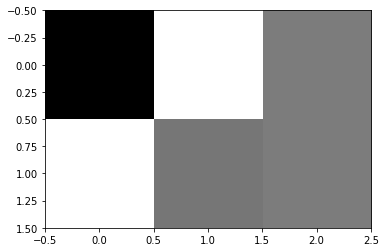

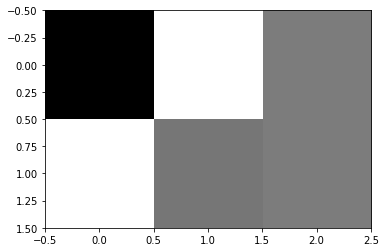

In [13]:
plt.imshow(t, cmap="gray")